
### Principal Component Analysis (PCA)

- เป็นเทคนิคการลดมิติข้อมูลที่ช่วยลดจำนวนคุณลักษณะในชุดข้อมูลโดยยังคงรักษาข้อมูลที่สำคัญที่สุดไว้ 

### 1. Import Denpendencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Creating Sample Dataset

In [2]:
data = {
    'Height': [170, 165, 180, 175, 160, 172, 168, 177, 162, 158],
    'Weight': [65, 59, 75, 68, 55, 70, 62, 74, 58, 54],
    'Age': [30, 25, 35, 28, 22, 32, 27, 33, 24, 21],
    'Gender': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0]  # 1 = Male, 0 = Female
}
df = pd.DataFrame(data)
print(df)

   Height  Weight  Age  Gender
0     170      65   30       1
1     165      59   25       0
2     180      75   35       1
3     175      68   28       1
4     160      55   22       0
5     172      70   32       1
6     168      62   27       0
7     177      74   33       1
8     162      58   24       0
9     158      54   21       0


### 3. Standardizing Data

- เนื่องจากคุณลักษณะต่างๆ มีมาตราส่วนที่แตกต่างกัน เช่น ส่วนสูงกับอายุ เราจึงทำการปรับมาตรฐานข้อมูล เพื่อให้คุณลักษณะทั้งหมดมีค่าเฉลี่ยเท่ากับ 0 และค่าเบี่ยงเบนมาตรฐานเท่ากับ 1 เพื่อไม่ให้คุณลักษณะใดคุณลักษณะหนึ่งมีอิทธิพลเหนือกว่าคุณลักษณะอื่นเพียงเพราะหน่วยวัด

In [3]:
X = df.drop('Gender', axis=1)
y = df['Gender']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 4. Applying Algorithm PCA

- เราลดข้อมูลจาก 3 คุณลักษณะเหลือ 2 คุณลักษณะใหม่ที่เรียกว่าส่วนประกอบหลัก (principal components) ส่วนประกอบเหล่านี้สามารถเก็บข้อมูลส่วนใหญ่จากข้อมูลเดิมได้ แต่ใช้มิติที่น้อยลง
- เราแบ่งข้อมูลออกเป็นชุดฝึกฝน 70% และชุดทดสอบ 30%
- เราฝึก โมเดล การถดถอยโลจิสติกส์โดยใช้ข้อมูลฝึกฝนที่ลดขนาดลง และทำนายป้ายกำกับเพศบนชุดข้อมูลทดสอบ

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

### 5. Evaluating with Confusion Matrix

- เมทริกซ์ความสับสนจะเปรียบเทียบป้ายกำกับจริงกับป้ายกำกับที่คาดการณ์ไว้ ทำให้เห็นได้ง่ายว่าการคาดการณ์ใดถูกต้องหรือผิดพลาด

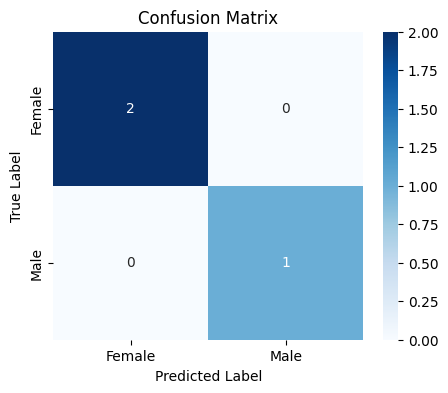

In [5]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()